benchmark,baseline,AMP,MPMXU


/tmp/ipykernel_1560299/1320232041.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), size = 22)


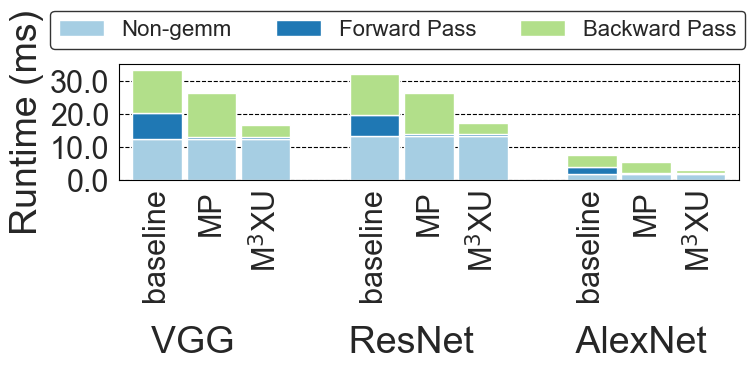

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import os
AMP_SPEED_UP = 10.442377447891248
MPMXU_SPEED_UP = 3.6467912851086886
def masure_profermance(name,df,filename, pivot_point):
    rest_duration_AMP = 0
    rest_duration_Baseline = 0
    rest_duration_MPMXU = 0

    fwdgemm_duration_AMP = 0
    fwdgemm_duration_Baseline = 0
    fwdgemm_duration_MPMXU = 0

    backgemm_duration_AMP = 0
    backgemm_duration_Baseline = 0
    backgemm_duration_MPMXU = 0

    with open(filename, newline='') as csvfile:
        data = list(csv.reader(csvfile, delimiter=','))
        for row in data[1:]:
            kernel_id = int(row[0])
            kernel_name = row[2]
            kernel_duration = float(row[10])/1e3
            # print(kernel_id, kernel_name, kernel_duration)
            if 'gemm' in kernel_name:
                if kernel_id < pivot_point: 
                    fwdgemm_duration_MPMXU += kernel_duration/AMP_SPEED_UP
                    fwdgemm_duration_AMP += kernel_duration/AMP_SPEED_UP
                    fwdgemm_duration_Baseline += kernel_duration
                else: 
                    backgemm_duration_AMP += kernel_duration
                    backgemm_duration_MPMXU += kernel_duration/MPMXU_SPEED_UP
                    backgemm_duration_Baseline += kernel_duration
            else: 
                rest_duration_AMP += kernel_duration
                rest_duration_MPMXU += kernel_duration
                rest_duration_Baseline += kernel_duration
    # print(os.path.splitext(filename)[0], total_duration_Baseline, total_duration_AMP, total_duration_MPMXU)
    # df.loc[len(df.index)] = [name, 'Non-gemm', 'Mixed-precision', rest_duration_AMP]
    # df.loc[len(df.index)] = [name, 'Non-gemm', 'MPCMXU', rest_duration_MPMXU]
    # df.loc[len(df.index)] = [name, 'Non-gemm', 'baseline', rest_duration_Baseline]
    # df.loc[len(df.index)] = [name, 'Forward Pass', 'Mixed-precision', fwdgemm_duration_AMP]
    # df.loc[len(df.index)] = [name, 'Forward Pass', 'MPCMXU', fwdgemm_duration_MPMXU]
    # df.loc[len(df.index)] = [name, 'Forward Pass', 'baseline', fwdgemm_duration_Baseline]
    # df.loc[len(df.index)] = [name, 'Backward Pass', 'Mixed-precision', backgemm_duration_AMP]
    # df.loc[len(df.index)] = [name, 'Backward Pass', 'MPCMXU', backgemm_duration_MPMXU]
    # df.loc[len(df.index)] = [name, 'Backward Pass', 'baseline', backgemm_duration_Baseline]
    # df.loc[len(df.index)] = [name, name+'\nbaseline' , rest_duration_Baseline, fwdgemm_duration_Baseline,backgemm_duration_Baseline]
    # df.loc[len(df.index)] = [name, name+'\nMP', rest_duration_AMP, fwdgemm_duration_AMP,backgemm_duration_AMP]
    # df.loc[len(df.index)] = [name, name+'\nMPCMXU' , rest_duration_MPMXU, fwdgemm_duration_MPMXU, backgemm_duration_MPMXU]
    df.loc[len(df.index)] = [name, '  baseline' , rest_duration_Baseline, fwdgemm_duration_Baseline,backgemm_duration_Baseline]
    df.loc[len(df.index)] = [name, 'MP', rest_duration_AMP, fwdgemm_duration_AMP,backgemm_duration_AMP]
    df.loc[len(df.index)] = [name, 'MPCMXU' , rest_duration_MPMXU, fwdgemm_duration_MPMXU, backgemm_duration_MPMXU]
    
    df.loc[len(df.index)] = ['', '' , 0, 0, 0]


df = pd.DataFrame(columns=['model','operation','Non-gemm','Forward Pass','Backward Pass'])
# df = pd.DataFrame(columns=['model','portion','operation','runtime'])
print('benchmark,baseline,AMP,MPMXU')
masure_profermance('VGG', df, 'vgg_small.csv',597)
masure_profermance('ResNet', df, 'resnet_small.csv',1493)
masure_profermance('AlexNet', df, 'alexnet_small.csv',332)
df = df[:-1]
df = df.replace(to_replace=r'MPCMXU', value='M$^3$XU', regex=True)

g =df.set_index('operation',).plot(kind='bar', stacked=True,width=0.91, color=sns.color_palette('Paired'),fontsize=16)
custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)
g.set(xlabel=None)
# g.set(ylabel='Runtime (ms)',fontsize=16)
g.set_ylabel('Runtime (ms)',fontsize=27)
g.set_xlabel(xlabel='VGG           ResNet          AlexNet',fontsize=27)
g.set_xticklabels(df['operation'],rotation=90,fontsize=22)
g.set_yticklabels(g.get_yticks(), size = 22)
plt.legend(ncol=3,bbox_to_anchor=(0.45, 1.56),fontsize=16, loc='upper center', edgecolor='black')
g.grid(axis='x')
# plt.figure(figsize=(10,1))
fig = g.figure
# fig.figure(figsize=(10,1))
# fig.set_figwidth(7)
# fig.set_figheight(6)
fig.set_figwidth(8)
fig.set_figheight(1.5)
plt.show()
fig.savefig('/nfshome/yuz057/2023MICRO-MPCMXU/Figures/Nebula.pdf',bbox_inches='tight') 


In [5]:
df.to_csv('nebula_result.csv',index=False)

In [1]:
import matplotlib.gridspec as gridspec

mrf_result = pd.read_csv("../snapMRF_mod/mrf_result.csv")
sns.set_theme()

fig, (ax1, ax2) = plt.subplots(ncols=2, 
                               figsize=(12, 6), 
                               gridspec_kw={'width_ratios': [1, 1]})


g1 = df.set_index('operation',).plot(
    ax=ax1,
    kind='bar', stacked=True,
    width=0.91, 
    color=sns.color_palette('Paired'),fontsize=15)
g1.set_xlabel(xlabel='VGG        ResNet      AlexNet\n(a)',fontsize=14)
g1.set_ylabel('Runtime (ms)',fontsize=19)
g1.set_xticklabels(df['operation'],rotation=90,fontsize=12)
ax1.legend(ncol=1,bbox_to_anchor=(0.77, 1.05),fontsize=10, loc='upper center')
g1.set_ylim(0, 90)


# plt.legend(fontsize=16)

g2 = mrf_result.set_index('NATOMS',).plot(
    ax=ax2,
    kind='bar', 
    stacked=True,width=0.91, 
    color=sns.color_palette('crest'),
    fontsize=15)
ax2.set(xlabel='\n(b)')
g2.set_xticklabels(mrf_result['NATOMS'],rotation=90,fontsize=12.5)
ax2.xaxis.set_tick_params(pad=11)
g2.set_xlabel('Number of atoms\n(b)',fontsize=14)
g2.set_ylabel('Speedup',fontsize=19)
g2.set_ylim(0, 1.5)
g2.get_legend().remove()
plt.subplots_adjust(wspace=0.35)



# xticks = g1.xaxis.get_ticklocs()
# xticklabels = [int(label.get_text()) if i%3==0 else '' for i,label in enumerate(g1.xaxis.get_ticklabels())]
# g1.xaxis.set_ticks(xticks)
# g1.xaxis.set_ticklabels(xticklabels)

fig.set_figheight(4)
fig.set_figwidth(8)
# plt.ylim(0.95, 1.3)
plt.show()
# fig.savefig('/nfshome/yuz057/2023MICRO-MPCMXU/Figures/NebulaNMRF.pdf',bbox_inches='tight') 


NameError: name 'pd' is not defined

In [119]:
mrf_result['NATOMS']

0      1323
1      1974
2      2772
3      3696
4      4221
5      4788
6      5985
7      6636
8      7308
9      8022
10     8799
11     9576
12    10374
13    11256
14    12117
15    13041
Name: NATOMS, dtype: int64